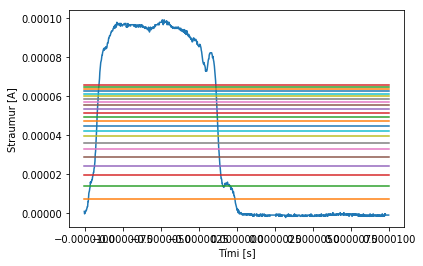

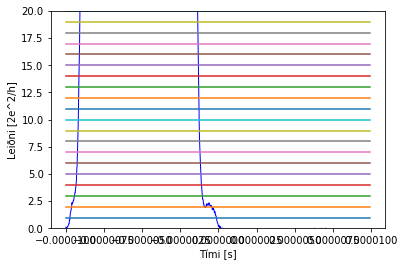

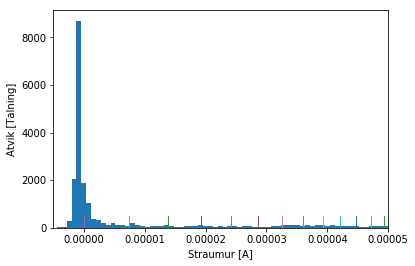

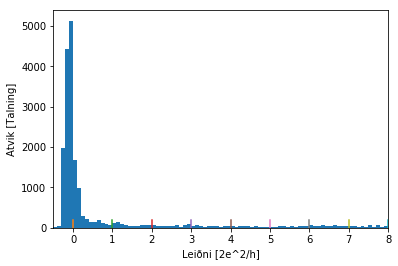

In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
from matplotlib import rc

# Svona getum við tekkað með utf-8 kóðun í ásamerkingum
#plot.rc('text', usetex=True)
#plot.rc('text.latex', preamble = r'\usepackage[T1]{fontenc}')

# Staðsetning gagnaskráa
#directory = '/home/thg191/Documents/HI/V2019/Verklegt/Leiðniskömmtun'
# Skilgreinum breytur
V0 = 0.1025     # Spenna frá spennugjafa
R = 1000        # Viðnám
Vz = 0          # Skekkja í sveiflusjá
# Vz = -0.7e-3
Iz = Vz/R       # Skekkja í straumi
BW = 8e-7
G0 = 7.7498e-5


# Hjálparforrit til að telja línur í skrá 
def file_len(filename):
    count = 0
    f = open(filename)
    lines = f.readlines()
    for line in lines:
        count = count + 1
    return count

# Hjálparforrit til að telja csv skrár í möppu
def file_num():#directory):
    files = 0
    for filename in os.listdir():#directory):
        if filename.endswith('.csv'):
            files = files + 1
    return files

# Opnum gagnaskrá til að vinna með
filename = "scope_112.csv"
count = file_len(filename) - 2
f = open(filename)
lines = f.readlines()[2:] # Sleppir fyrstu 2 línum í skránni

# Flytjum gögn úr skránni í fylki
t = np.empty([count], dtype = np.double())
VR = np.empty([count], dtype = np.double())
I = np.empty([count], dtype = np.double())
i = 0
for line in lines:
    line.rstrip('\n')
    line = [np.double(i) for i in line.split(',')]
    t[i] = line[0]
    VR[i] = line[1] - Vz
    I[i] = (1/R)*line[1] - Iz
    i = i + 1

# Plottum straum sem fall af tíma ásamt væntigildum
fig1, ax = plot.subplots()
ax.plot(t, I)
ax.set(xlabel = 'Tími [s]', ylabel = 'Straumur [A]')

for n in range(1,24):
#    I = (V0/R)/(1 + (12.9e3/R)/n)
#    I = (V0)/(1 + (12.9e3/R)/n)
    In = (V0)/(R + (12.9e3/n))
    ax.plot([min(t), max(t)], [In, In])

fig1.savefig('scope_4-tI.png')
fig1.show()

# Plottum leiðni sem fall af tíma ásamt væntigildum
G = np.divide(np.divide(VR, R),(V0-VR))

fig2, bx = plot.subplots()
bx.plot(t, np.divide(G,G0), 'b', Linewidth = 1)
bx.set(ylabel = u'Leiðni [2e^2/h]', xlabel = 'Tími [s]')
plot.ylim(0,20)
for n in range(1,24):
    bx.plot([min(t), max(t)], [n, n])
fig2.savefig('scope_4-tC.png')
fig2.show()

# Sameinum öll mæligögnin í eitt fylki
totcount = count*file_num()#directory)
TOT = np.empty([totcount], dtype = np.double)
c = 0
for filename in os.listdir():#directory):
    if filename.endswith('.csv'):
        scope = open(filename)
        scopelines = scope.readlines()[2:]
        for line in scopelines:
            line.rstrip('\n')
            line = [np.double(i) for i in line.split(',')]
            TOT[c] = line[1]
            c = c + 1
# Munum að draga Vz frá gildunum
TOT = TOT - Vz

# Plottum stuðlarit af straumi ásamt væntigildum
fig3, cx = plot.subplots()
data1 = np.divide(TOT,R)
cx.hist(data1, np.arange(-1e-5, 1e-4 + BW, BW))

for n in range(1,24):
    I = (V0/R)/(1 + (12.9e3/R)/n)
    cx.plot([I,I],[0,500], Linewidth = 1)
cx.plot([0,0], [0,500], Linewidth = 1)

cx.set_xlim([-0.5e-5, 5e-5])
cx.set(xlabel = u'Straumur [A]', ylabel = 'Atvik [Talning]')
fig3.savefig('TOThistoI.png')
fig3.show()

# Plottum stuðlarit af leiðni ásamt væntigildum
TOT_G = np.divide(np.divide(TOT,R), (V0 - TOT))

fig4, dx = plot.subplots()
#f4 = plot.figure(4)
data2 = np.divide(TOT_G, G0)
dx.hist(data2, np.arange(-1, 12 + 0.1, 0.1))
dx.set(xlabel = u'Leiðni [2e^2/h]', ylabel = 'Atvik [Talning]')
dx.set_xlim([-0.5, 8])

for n in range(24):
    dx.plot([n, n], [0, 200]) 

fig4.savefig('TOThistoC.png')
fig4.show()
